### Ch12_3_1.py

In [1]:
from keras.datasets import reuters

# 載入 Reuters 資料集, 如果是第一次載入會自行下載資料集
top_words = 10000
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(
                                       num_words=top_words)
# 形狀
print("X_train.shape: ", X_train.shape)
print("Y_train.shape: ", Y_train.shape)
print("X_test.shape: ", X_test.shape)
print("Y_test.shape: ", Y_test.shape)
# 顯示 Numpy 陣列內容
print(X_train[0])
print(Y_train[0])   # 標籤資料

Using TensorFlow backend.


2113536/2110848 [==============================] - 1s 0us/step
X_train.shape:  (8982,)
Y_train.shape:  (8982,)
X_test.shape:  (2246,)
Y_test.shape:  (2246,)
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3


### Ch12_3_1a.py

In [2]:
from keras.datasets import reuters

# 載入 Reuters 資料集, 如果是第一次載入會自行下載資料集
top_words = 10000
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(
                                       num_words=top_words)
# 最大的單字索引值
max_index = max(max(sequence) for sequence in X_train)
print("Max Index: ", max_index)
# 建立新聞的解碼字典
word_index = reuters.get_word_index()
we_index = word_index["we"]
print("'we' index:", we_index)
decode_word_map = dict([(value, key) for (key, value)
                                  in word_index.items()])
print(decode_word_map[we_index])
# 解碼顯示新聞內容
decoded_indices = [decode_word_map.get(i-3, "?")
                           for i in X_train[0]]
print(decoded_indices)
decoded_news = " ".join(decoded_indices)
print(decoded_news)

Max Index:  9999
557056/550378 [==============================] - 0s 1us/step
'we' index: 112
we
['?', '?', '?', 'said', 'as', 'a', 'result', 'of', 'its', 'december', 'acquisition', 'of', 'space', 'co', 'it', 'expects', 'earnings', 'per', 'share', 'in', '1987', 'of', '1', '15', 'to', '1', '30', 'dlrs', 'per', 'share', 'up', 'from', '70', 'cts', 'in', '1986', 'the', 'company', 'said', 'pretax', 'net', 'should', 'rise', 'to', 'nine', 'to', '10', 'mln', 'dlrs', 'from', 'six', 'mln', 'dlrs', 'in', '1986', 'and', 'rental', 'operation', 'revenues', 'to', '19', 'to', '22', 'mln', 'dlrs', 'from', '12', '5', 'mln', 'dlrs', 'it', 'said', 'cash', 'flow', 'per', 'share', 'this', 'year', 'should', 'be', '2', '50', 'to', 'three', 'dlrs', 'reuter', '3']
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and ren

### Ch12_3_1b.py

In [3]:
import numpy as np
from keras.datasets import reuters
from keras.preprocessing import sequence
from keras.utils import to_categorical

seed = 10
np.random.seed(seed)  # 指定亂數種子
# 載入Reuters資料集
top_words = 10000
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(
                                       num_words=top_words)
# 資料預處理
max_words = 200 
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

print("X_train.shape: ", X_train.shape)
print("X_test.shape: ", X_test.shape)
# One-hot編碼
Y_train = to_categorical(Y_train, 46)
Y_test = to_categorical(Y_test, 46)

X_train.shape:  (8982, 200)
X_test.shape:  (2246, 200)


### Ch12_3_2.py
* MLP

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 200, 32)           320000    
_________________________________________________________________
dropout_7 (Dropout)          (None, 200, 32)           0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                409664    
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)               

/opt/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


2246/2246 [==============================] - 0s 20us/step
測試資料集的準確度 = 0.71


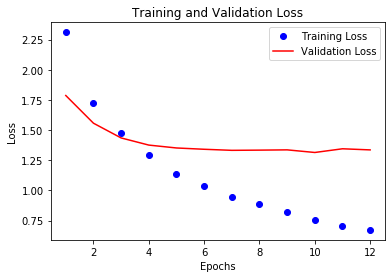

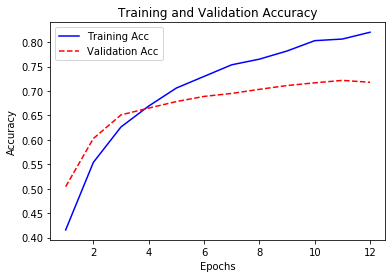

In [6]:
import numpy as np
from keras.datasets import reuters
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout, Flatten
from keras.utils import to_categorical
%matplotlib inline

seed = 10
np.random.seed(seed)  # 指定亂數種子
# 載入Reuters資料集
top_words = 10000
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(
                                       num_words=top_words)
# 資料預處理
max_words = 200 
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
# One-hot編碼
Y_train = to_categorical(Y_train, 46)
Y_test = to_categorical(Y_test, 46)
# 定義模型
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Dropout(0.75))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(46, activation="softmax"))
model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam", 
              metrics=["accuracy"])
# 訓練模型
history = model.fit(X_train, Y_train, validation_split=0.2, 
          epochs=12, batch_size=32, verbose=0)
# 評估模型
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 顯示訓練和驗證損失圖表
import matplotlib.pyplot as plt

loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "r", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "b-", label="Training Acc")
plt.plot(epochs, val_acc, "r--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Ch12_3_3.py
* LSTM

In [ ]:
import numpy as np
from keras.datasets import reuters
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, Dropout, LSTM, Dense
from keras.utils import to_categorical

seed = 10
np.random.seed(seed)  # 指定亂數種子
# 載入Reuters資料集
top_words = 10000
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=top_words)
# 資料預處理
max_words = 200 
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
# One-hot編碼
Y_train = to_categorical(Y_train, 46)
Y_test = to_categorical(Y_test, 46)
# 定義模型
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Dropout(0.75))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(46, activation="softmax"))
model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="rmsprop", 
              metrics=["accuracy"])
# 訓練模型
history = model.fit(X_train, Y_train, validation_split=0.2, 
                    epochs=40, batch_size=32, verbose=0)
# 評估模型
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 顯示訓練和驗證損失圖表
import matplotlib.pyplot as plt

loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "r", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "b-", label="Training Acc")
plt.plot(epochs, val_acc, "r--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 200, 32)           320000    
_________________________________________________________________
dropout_10 (Dropout)         (None, 200, 32)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 200, 32)           8320      
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_11 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 46)                1518      
Total params: 338,158
Trainable params: 338,158
Non-trainable params: 0
________________________________________________

/opt/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
